In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# results

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/new network dataset/http_Attack_Port80.csv')
# df1['attack']='HTTP'
df2=pd.read_csv('/content/drive/MyDrive/new network dataset/randIP_SYN_Attack_Port22.csv')
# df2['attack']='SYN'
df3=pd.read_csv('/content/drive/MyDrive/new network dataset/randIP_UDP_Attack_Port53.csv')
# df3['attack']='UDP'
df4=pd.read_csv('/content/drive/MyDrive/new network dataset/sameIP_SYN_Attack_Port22.csv')
# df4['attack']='SYN'
df5=pd.read_csv('/content/drive/MyDrive/new network dataset/sameIP_UDP_Attack_Port53.csv')
# df5['attack']='UDP'

In [ ]:
f1f=list(df1.columns)
f2f=list(df2.columns)
f3f=list(df3.columns)
f4f=list(df4.columns)
f5f=list(df5.columns)

cols=[]
for i in f1f:
  if str(i) in f2f and f3f and f4f and f5f:
    print(f"'{i}'")
    cols.append(i)



'_path'
'ts'
'duration'
'local_orig'
'uid'
'id.orig_h'
'id.orig_p'
'id.resp_h'
'id.resp_p'
'proto'
'service'
'orig_bytes'
'resp_bytes'
'conn_state'
'local_resp'
'missed_bytes'
'history'
'orig_pkts'
'orig_ip_bytes'
'resp_pkts'
'resp_ip_bytes'
'tunnel_parents'
'geo.orig.country_code'
'geo.orig.region'
'geo.orig.city'
'geo.orig.latitude'
'geo.orig.longitude'
'geo.resp.country_code'
'geo.resp.region'
'geo.resp.city'
'geo.resp.latitude'
'geo.resp.longitude'
'community_id'
'name'
'addl'
'notice'
'peer'


In [ ]:
fcols=[]
for i in cols:
  if df1[str(i)].isnull().all() and df2[str(i)].isnull().all() and df3[str(i)].isnull().all() and df4[str(i)].isnull().all() and df5[str(i)].isnull().all():
    pass
  else:
    print(f"'{i}'")
    fcols.append(i)

'_path'
'ts'
'duration'
'uid'
'id.orig_h'
'id.orig_p'
'id.resp_h'
'id.resp_p'
'proto'
'service'
'orig_bytes'
'resp_bytes'
'conn_state'
'missed_bytes'
'history'
'orig_pkts'
'orig_ip_bytes'
'resp_pkts'
'resp_ip_bytes'
'geo.orig.country_code'
'geo.orig.region'
'geo.orig.city'
'geo.orig.latitude'
'geo.orig.longitude'
'community_id'
'name'
'notice'
'peer'


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/new network dataset/http_Attack_Port80.csv',usecols=fcols)
df1['attack']='HTTP'
df2=pd.read_csv('/content/drive/MyDrive/new network dataset/randIP_SYN_Attack_Port22.csv',usecols=fcols)
df2['attack']='SYN'
df3=pd.read_csv('/content/drive/MyDrive/new network dataset/randIP_UDP_Attack_Port53.csv',usecols=fcols)
df3['attack']='UDP'
df4=pd.read_csv('/content/drive/MyDrive/new network dataset/sameIP_SYN_Attack_Port22.csv',usecols=fcols)
df4['attack']='SYN'
df5=pd.read_csv('/content/drive/MyDrive/new network dataset/sameIP_UDP_Attack_Port53.csv',usecols=fcols)
df5['attack']='UDP'
# df1.info()

In [ ]:
df = pd.concat([df1, df2,df3, df4,df5],ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225398 entries, 0 to 225397
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   _path                  225398 non-null  object 
 1   ts                     225398 non-null  object 
 2   duration               84848 non-null   object 
 3   uid                    213907 non-null  object 
 4   id.orig_h              213907 non-null  object 
 5   id.orig_p              213907 non-null  float64
 6   id.resp_h              213907 non-null  object 
 7   id.resp_p              213907 non-null  float64
 8   proto                  138938 non-null  object 
 9   service                12005 non-null   object 
 10  orig_bytes             73362 non-null   float64
 11  resp_bytes             73362 non-null   float64
 12  conn_state             138929 non-null  object 
 13  missed_bytes           138929 non-null  float64
 14  history                138927 non-nu

In [ ]:

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['_path']=le.fit_transform(df['_path'])
df['peer']=le.fit_transform(df['peer'])
df['notice']=le.fit_transform(df['notice'])
df['name']=le.fit_transform(df['name'])
df['community_id']=le.fit_transform(df['community_id'])
df['geo.orig.city']=le.fit_transform(df['geo.orig.city'])
df['geo.orig.region']=le.fit_transform(df['geo.orig.region'])
df['geo.orig.country_code']=le.fit_transform(df['geo.orig.country_code'])
df['history']=le.fit_transform(df['history'])
df['conn_state']=le.fit_transform(df['conn_state'])
df['service']=le.fit_transform(df['service'])
df['proto']=le.fit_transform(df['proto'])
df['id.resp_h']=le.fit_transform(df['id.resp_h'])
df['id.orig_h']=le.fit_transform(df['id.orig_h'])
df['uid']=le.fit_transform(df['uid'])
df['ts']=le.fit_transform(df['ts'])


In [ ]:
df['geo.orig.latitude']=df['geo.orig.latitude'].astype(float)


In [ ]:
df['Seconds'] = df['duration'].str.extract(r'(\d+)s')
df['Milliseconds'] = df['duration'].str.extract(r'(\d+)ms')
del df['duration']

df['Seconds']=df['Seconds'].astype(float)
df['Milliseconds']=df['Milliseconds'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225398 entries, 0 to 225397
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   _path                  225398 non-null  int64  
 1   ts                     225398 non-null  int64  
 2   uid                    225398 non-null  int64  
 3   id.orig_h              225398 non-null  int64  
 4   id.orig_p              213907 non-null  float64
 5   id.resp_h              225398 non-null  int64  
 6   id.resp_p              213907 non-null  float64
 7   proto                  225398 non-null  int64  
 8   service                225398 non-null  int64  
 9   orig_bytes             73362 non-null   float64
 10  resp_bytes             73362 non-null   float64
 11  conn_state             225398 non-null  int64  
 12  missed_bytes           138929 non-null  float64
 13  history                225398 non-null  int64  
 14  orig_pkts              138929 non-nu

In [ ]:
df['id.orig_p'].fillna(df['id.orig_p'].mean(), inplace=True)
df['id.resp_p'].fillna(df['id.resp_p'].mean(), inplace=True)
df['orig_bytes'].fillna(df['orig_bytes'].mean(), inplace=True)
df['resp_bytes'].fillna(df['resp_bytes'].mean(), inplace=True)
df['missed_bytes'].fillna(df['missed_bytes'].mean(), inplace=True)
df['orig_pkts'].fillna(df['orig_pkts'].mean(), inplace=True)
df['orig_ip_bytes'].fillna(df['orig_ip_bytes'].mean(), inplace=True)
df['resp_pkts'].fillna(df['resp_pkts'].mean(), inplace=True)
df['resp_ip_bytes'].fillna(df['resp_ip_bytes'].mean(), inplace=True)
df['geo.orig.latitude'].fillna(df['geo.orig.latitude'].mean(), inplace=True)
df['geo.orig.longitude'].fillna(df['geo.orig.longitude'].mean(), inplace=True)
df['Seconds'].fillna(df['geo.orig.latitude'].mean(), inplace=True)
df['Milliseconds'].fillna(df['geo.orig.longitude'].mean(), inplace=True)

In [ ]:
# df.to_csv('SNAdata.csv',index=False)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_path,225398.0,1.379254,1.803072,0.0000,0.000000,0.000000,4.000000,4.000
ts,225398.0,84390.327647,40309.749294,0.0000,56325.250000,88218.000000,116379.750000,153385.000
uid,225398.0,73020.614123,41948.335787,0.0000,36616.250000,73242.500000,109808.750000,138929.000
id.orig_h,225398.0,31000.058780,14780.503314,0.0000,26569.000000,26569.000000,34748.000000,64414.000
id.orig_p,225398.0,20947.928464,12577.774639,3.0000,11244.000000,20635.500000,28112.000000,60998.000
id.resp_h,225398.0,1.254980,1.099971,0.0000,1.000000,1.000000,1.000000,6.000
id.resp_p,225398.0,47.014815,36.652525,0.0000,22.000000,53.000000,53.000000,5353.000
proto,225398.0,2.046642,0.847573,0.0000,1.000000,2.000000,3.000000,3.000
service,225398.0,1.946699,0.224812,0.0000,2.000000,2.000000,2.000000,2.000
orig_bytes,225398.0,57.769894,74.839110,0.0000,0.000000,57.769894,57.769894,692.000


In [ ]:
df['attack'].value_counts()

UDP     125959
SYN      63814
HTTP     35625
Name: attack, dtype: int64

In [ ]:
2    125959
1     63814
0     35625

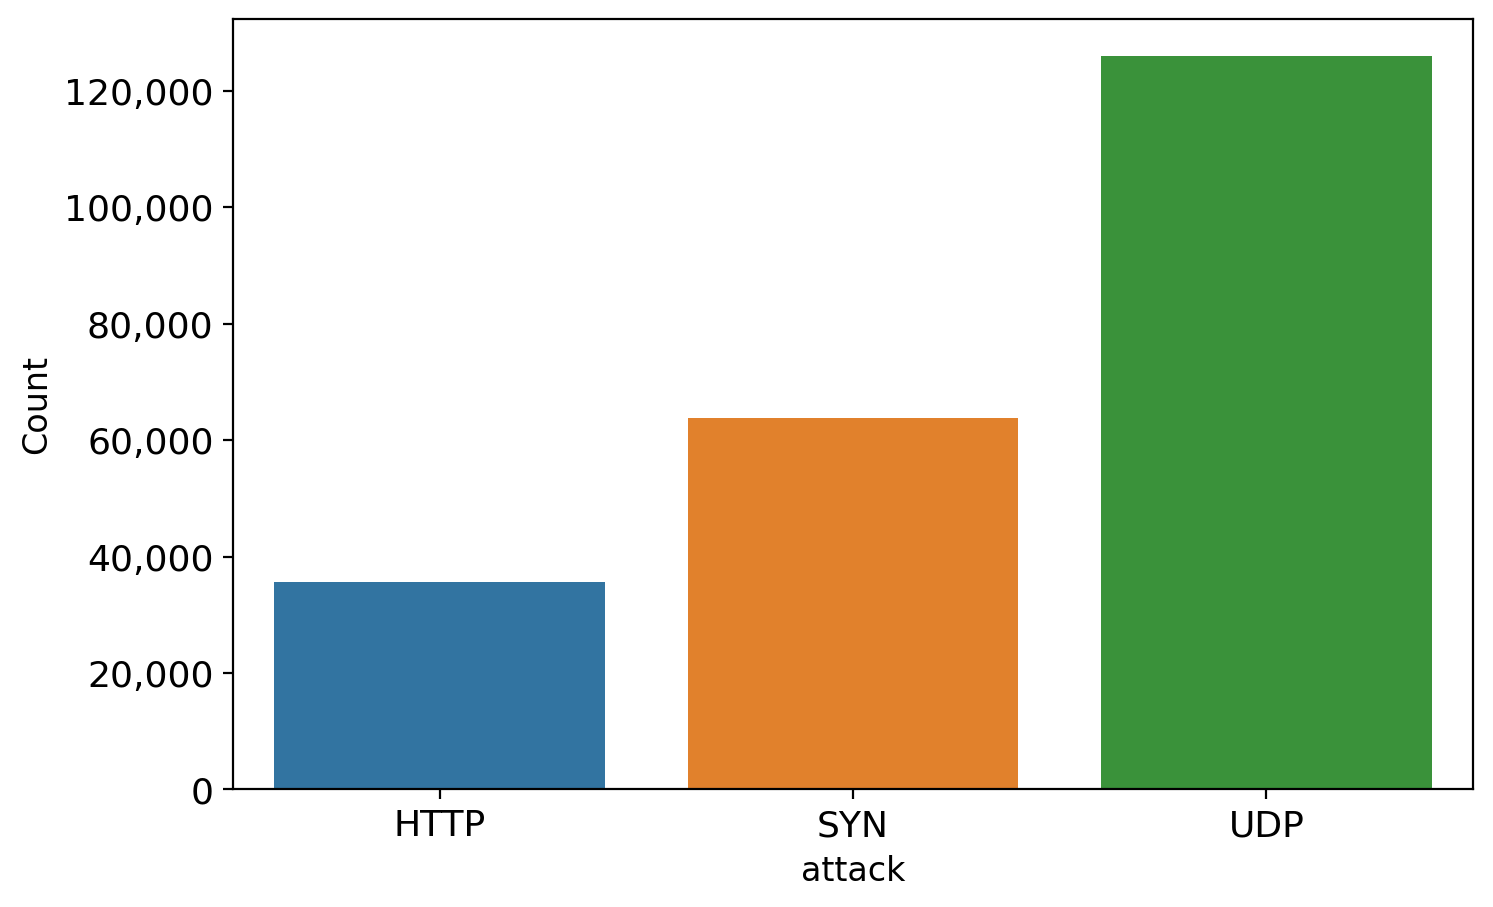

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter
plt.figure(figsize=(8,5), dpi = 200)
p=sns.countplot(x='attack',data= df )
p.yaxis.set_major_formatter(y_format)
p.tick_params(labelsize=13)
# plt.xticks(rotation = 50)
plt.xlabel("attack",fontsize=12)
plt.ylabel("Count",fontsize=12)
# plt.savefig('barchart.pdf',dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['attack']=le.fit_transform(df['attack'])
df['attack'].value_counts()

2    125959
1     63814
0     35625
Name: attack, dtype: int64

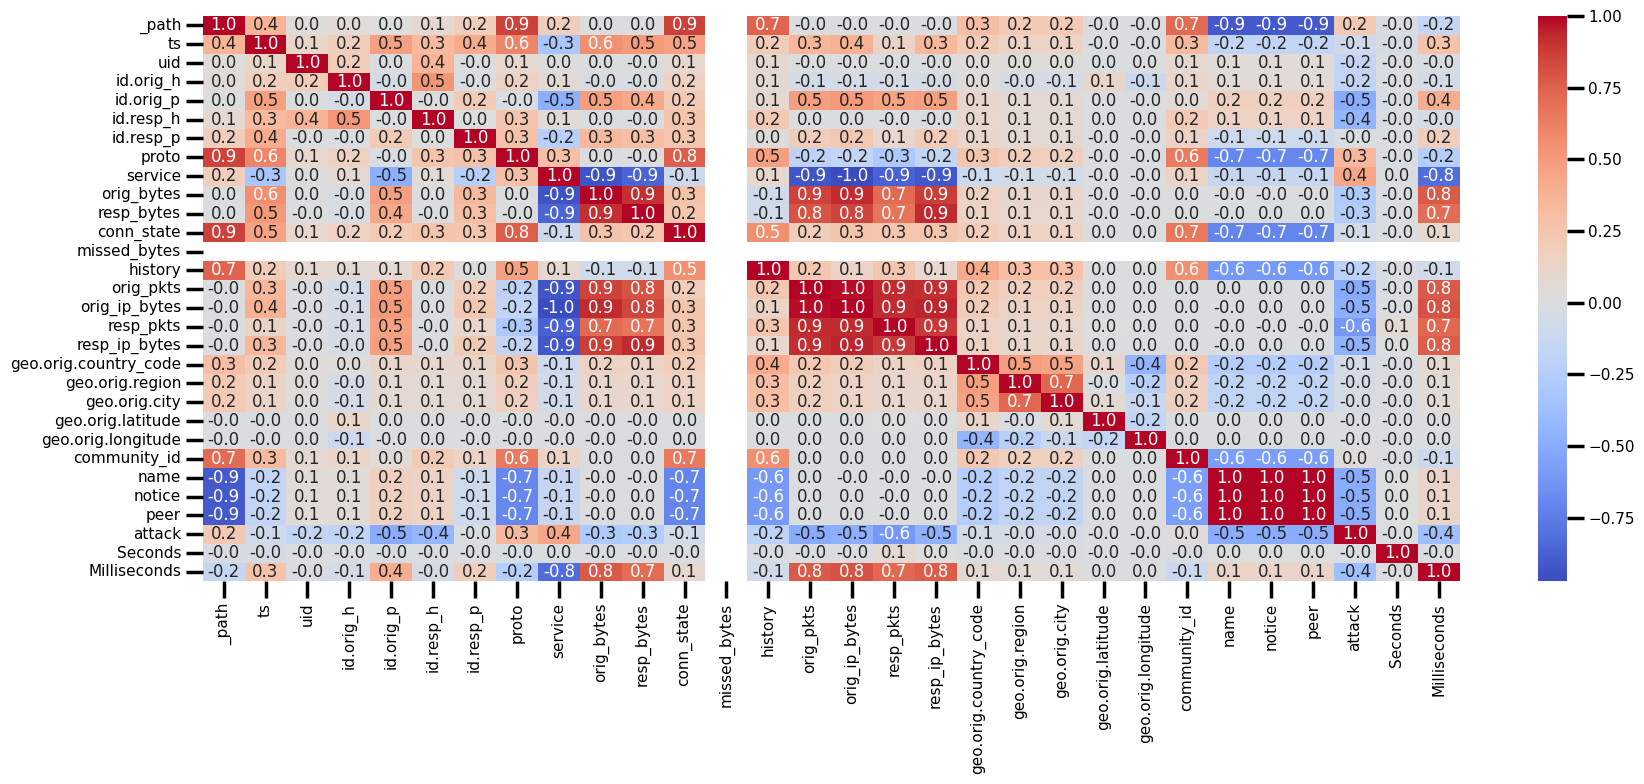

In [ ]:
plt.figure(figsize=(18,8), dpi = 100)
sns.set_context('poster', font_scale=0.5)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True,fmt='.1f')
# plt.xticks(rotation = 50)
# plt.savefig('correation.pdf',dpi=100,bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In [ ]:
x=df.drop(['attack'],axis=1)
y=df['attack']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2,random_state=0,shuffle=True)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
print("GNB")

estimators = [
    ('rf', RandomForestClassifier(n_estimators=3,max_depth=3, random_state=0)),
    ('svr',GaussianNB())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=30,max_depth=30, random_state=0)
)


start = time.time()
# Fit the stacking classifier to the training data
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

# Evaluate the performance of the stacking classifier on the testing data
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
cf_matrix=confusion_matrix(Y_test, y_pred)
cf_matrix

GNB
Training time: 5.952672958374023s
Accuracy:  0.999977817213842
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7135
           1       1.00      1.00      1.00     12792
           2       1.00      1.00      1.00     25153

    accuracy                           1.00     45080
   macro avg       1.00      1.00      1.00     45080
weighted avg       1.00      1.00      1.00     45080



array([[ 7134,     1,     0],
       [    0, 12792,     0],
       [    0,     0, 25153]])

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.5 MB/s eta 0:00:00


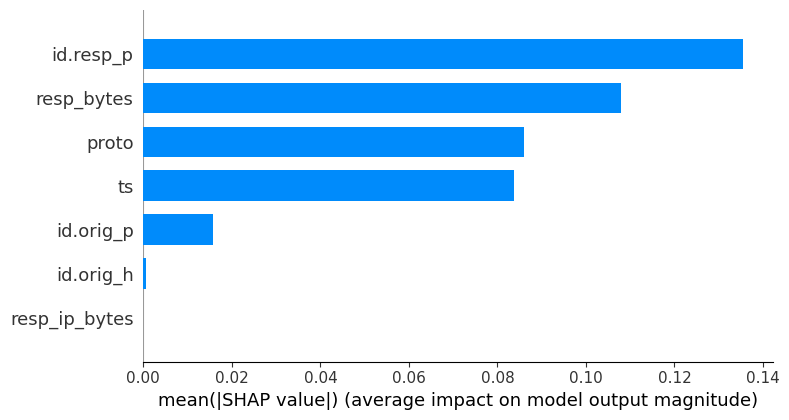

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import shap


# train random forest model
rf = RandomForestClassifier(n_estimators=3,max_depth=3, random_state=0)
rf.fit(X_train, Y_train)

# calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# visualize feature importance using SHAP summary plot
shap.summary_plot(shap_values[1], X_test,plot_type="bar",max_display=7)

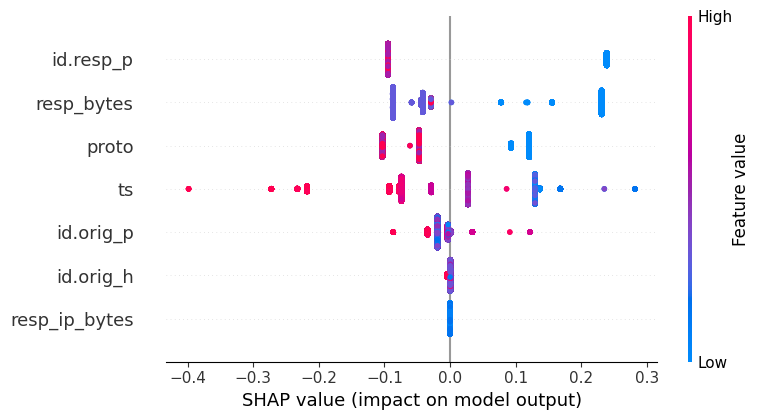

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import shap


# train random forest model
rf = RandomForestClassifier(n_estimators=3,max_depth=3, random_state=0)
rf.fit(X_train, Y_train)

# calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# visualize feature importance using SHAP summary plot
shap.summary_plot(shap_values[1], X_test,max_display=7)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
print("GNB")

estimators = [
    ('rf', RandomForestClassifier(n_estimators=3,max_depth=3, random_state=0)),
    ('svr',GaussianNB())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=30,max_depth=30, random_state=0)
)


start = time.time()
# Fit the stacking classifier to the training data
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

# Evaluate the performance of the stacking classifier on the testing data
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
cf_matrix=confusion_matrix(Y_test, y_pred)
cf_matrix

GNB
Training time: 4.129465341567993s
Accuracy:  0.999977817213842
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7135
           1       1.00      1.00      1.00     12792
           2       1.00      1.00      1.00     25153

    accuracy                           1.00     45080
   macro avg       1.00      1.00      1.00     45080
weighted avg       1.00      1.00      1.00     45080



array([[ 7134,     1,     0],
       [    0, 12792,     0],
       [    0,     0, 25153]])

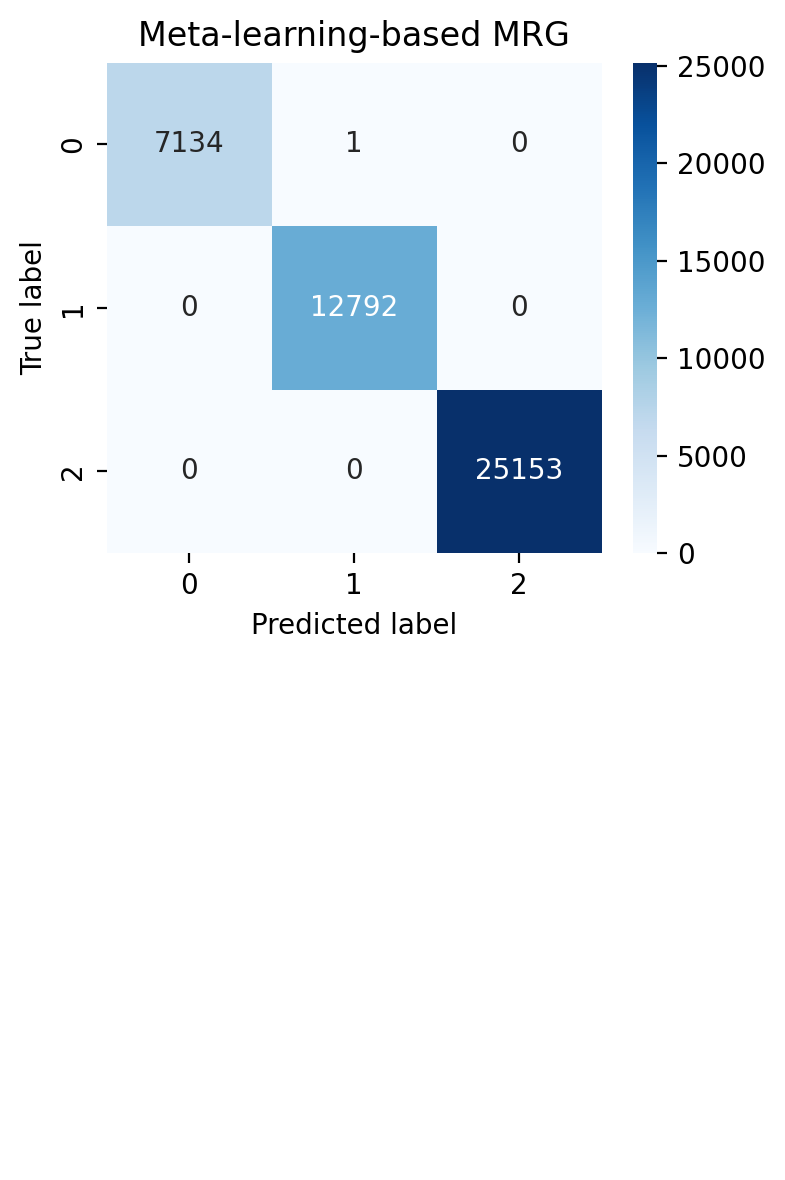

In [ ]:
array1=[[ 7134,     1,     0],
       [    0, 12792,     0],
       [    0,     0, 25153]]

array2=[[ 4026,     1,  3108],
       [   14, 12772,     6],
       [ 1229,     2, 23922]]



# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4,6),dpi=200)

# Create a list of confusion matrices and corresponding titles
cms =    [array1, array2]
titles = ['Meta-learning-based MRG'  ,'LR']

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat[:-1], cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='g')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
axes.flat[-1].axis('off')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.tight_layout()
# Display the figure
# plt.savefig('froncm.pdf')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf = RandomForestClassifier(n_estimators=1,max_depth=2, random_state=0,criterion='entropy')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=RandomForestClassifier(n_estimators=1,max_depth=2, random_state=0,criterion='entropy')
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

RF
Training time: 0.14996838569641113s
accuracy score 0.989019520851819
error rate: 0.01098047914818101
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7135
           1       1.00      0.96      0.98     12792
           2       0.98      1.00      0.99     25153

    accuracy                           0.99     45080
   macro avg       0.99      0.99      0.99     45080
weighted avg       0.99      0.99      0.99     45080

0.9883 accuracy with a standard deviation of 0.0008


array([[ 7127,     7,     1],
       [    0, 12305,   487],
       [    0,     0, 25153]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=90,multi_class='auto',C=1.0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=LogisticRegression(random_state=0, solver='lbfgs',max_iter=90,multi_class='auto',C=1.0)
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

Training time: 13.381033420562744s
accuracy score 0.9032830523513753
error rate: 0.09671694764862471
              precision    recall  f1-score   support

        HTTP       0.76      0.56      0.65      7135
         SYN       1.00      1.00      1.00     12792
         UDP       0.88      0.95      0.92     25153

    accuracy                           0.90     45080
   macro avg       0.88      0.84      0.85     45080
weighted avg       0.90      0.90      0.90     45080

0.9098 accuracy with a standard deviation of 0.0220


array([[ 4026,     1,  3108],
       [   14, 12772,     6],
       [ 1229,     2, 23922]])

In [ ]:
from sklearn.svm import LinearSVC
print("SVC")
clf = LinearSVC(random_state=0,max_iter=500)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=LinearSVC(random_state=0,max_iter=500)
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

SVC
Training time: 65.73245620727539s
accuracy score 0.896606033717835
error rate: 0.10339396628216502
              precision    recall  f1-score   support

        HTTP       1.00      0.35      0.52      7135
         SYN       1.00      1.00      1.00     12792
         UDP       0.84      1.00      0.92     25153

    accuracy                           0.90     45080
   macro avg       0.95      0.78      0.81     45080
weighted avg       0.91      0.90      0.88     45080

0.9219 accuracy with a standard deviation of 0.0250


array([[ 2476,     1,  4658],
       [    0, 12791,     1],
       [    1,     0, 25152]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
print("GNB")
clf = GaussianNB()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=GaussianNB()
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

GNB
Training time: 0.14872193336486816s
accuracy score 0.9891748003549246
error rate: 0.010825199645075445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7135
           1       1.00      0.96      0.98     12792
           2       0.98      1.00      0.99     25153

    accuracy                           0.99     45080
   macro avg       0.99      0.99      0.99     45080
weighted avg       0.99      0.99      0.99     45080

0.9896 accuracy with a standard deviation of 0.0035


array([[ 7134,     0,     1],
       [    2, 12308,   482],
       [    3,     0, 25150]])

## GRU

In [ ]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,GRU,Dropout
# Build the LSTM model
model = Sequential()
model.add(GRU(8, input_shape= (X_train.shape[1], 1)))
# model.add(Dense(16,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, to_categorical(Y_train, num_classes=3), validation_split=0.1, epochs=5)
stop = time.time()
print(f"Training time: {stop - start}s")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8)                 264       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 3)                 27        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5072/5072 [==============================] - 36s 6ms/step - loss: 0.3783 - accuracy: 0.8568 - val_loss: 0.1550 - val_accuracy: 0.9458
Epoch 2/5
5072/5072 [==============================] - 30s 6ms/step - loss: 0.2089 - accuracy: 0.9224 - val_loss: 0.0177 - val_accuracy: 0.9992
Epoch 3/5
5072/5072 [========

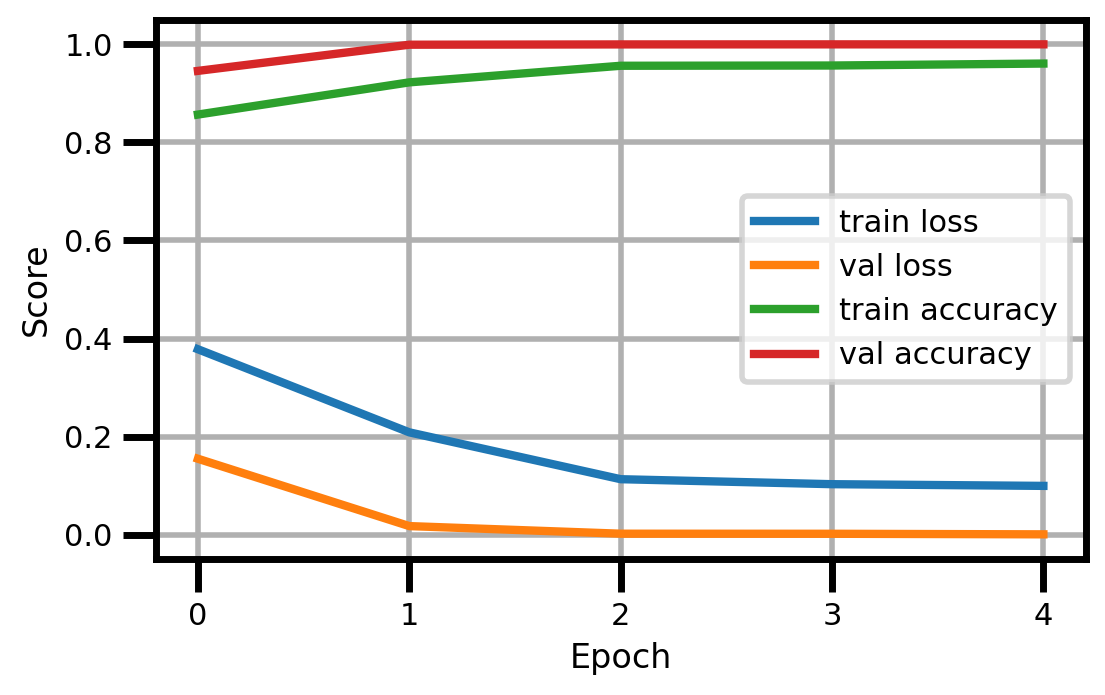

In [ ]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 3.5), dpi = 200)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.legend()

In [ ]:
scores = model.predict(X_test)
print('accuracy score',accuracy_score(Y_test,scores.argmax(axis=1)))
print('error rate:',1-accuracy_score(Y_test,scores.argmax(axis=1)))
print(classification_report(Y_test,scores.argmax(axis=1)))
confusion_matrix(Y_test,scores.argmax(axis=1))

1409/1409 [==============================] - 5s 4ms/step
accuracy score 0.9998225377107365
error rate: 0.00017746228926351915
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7135
           1       1.00      1.00      1.00     12792
           2       1.00      1.00      1.00     25153

    accuracy                           1.00     45080
   macro avg       1.00      1.00      1.00     45080
weighted avg       1.00      1.00      1.00     45080



array([[ 7135,     0,     0],
       [    5, 12787,     0],
       [    1,     2, 25150]])

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_model():
  model = Sequential()
  model.add(GRU(8, input_shape= (X_train.shape[1], 1)))
  # model.add(Dense(16,activation='relu'))
  model.add(Dropout(0.6))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
  return model

estimator = KerasClassifier(
    build_fn=create_model,
    epochs = 5,
    verbose=1
)
cv_scores = cross_val_score(estimator,
                            x,to_categorical(y, num_classes=3),
                            cv=10
                           )
# cv_scores.mean()
print("%0.4f accuracy with a standard deviation of %0.4f" % (cv_scores.mean(), cv_scores.std()))

Epoch 1/5
6340/6340 [==============================] - 35s 5ms/step - loss: 0.2252 - accuracy: 0.9088
Epoch 2/5
6340/6340 [==============================] - 39s 6ms/step - loss: 0.1029 - accuracy: 0.9584
Epoch 3/5
6340/6340 [==============================] - 32s 5ms/step - loss: 0.0769 - accuracy: 0.9725
Epoch 4/5
6340/6340 [==============================] - 35s 5ms/step - loss: 0.0740 - accuracy: 0.9731
Epoch 5/5
705/705 [==============================] - 3s 3ms/step - loss: 1.1690e-06 - accuracy: 1.0000
Epoch 1/5
6340/6340 [==============================] - 34s 5ms/step - loss: 0.3209 - accuracy: 0.8721
Epoch 2/5
6340/6340 [==============================] - 31s 5ms/step - loss: 0.1020 - accuracy: 0.9683
Epoch 3/5
6340/6340 [==============================] - 33s 5ms/step - loss: 0.0868 - accuracy: 0.9724
Epoch 4/5
6340/6340 [==============================] - 31s 5ms/step - loss: 0.0824 - accuracy: 0.9745
Epoch 5/5
705/705 [==============================] - 3s 3ms/step - loss: 0.0053 -

## CNN

In [ ]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,Embedding, Dropout,GRU,SimpleRNN,Conv1D,MaxPool1D,Flatten
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
# Build the LSTM model
model = Sequential()
model.add(Conv1D(8, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Flatten())
# model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, to_categorical(Y_train, num_classes=3), validation_split=0.1, epochs=5)
stop = time.time()
print(f"Training time: {stop - start}s")

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 29, 8)             32        
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 7, 8)             0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 56)                0         
                                                                 
 dropout_15 (Dropout)        (None, 56)                0         
                                                                 
 dense_15 (Dense)            (None, 3)                 171       
                                                                 
Total params: 203
Trainable params: 203
Non-trainable params: 0
_______________________________________________________

In [ ]:
scores = model.predict(X_test)
print('accuracy score',accuracy_score(Y_test,scores.argmax(axis=1)))
print('error rate:',1-accuracy_score(Y_test,scores.argmax(axis=1)))
print(classification_report(Y_test,scores.argmax(axis=1)))
confusion_matrix(Y_test,scores.argmax(axis=1))

1409/1409 [==============================] - 2s 2ms/step
accuracy score 0.9987577639751553
error rate: 0.001242236024844745
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7135
           1       1.00      1.00      1.00     12792
           2       1.00      1.00      1.00     25153

    accuracy                           1.00     45080
   macro avg       1.00      1.00      1.00     45080
weighted avg       1.00      1.00      1.00     45080



array([[ 7102,    31,     2],
       [   21, 12770,     1],
       [    1,     0, 25152]])

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_model():
  model = Sequential()
  model.add(Conv1D(8, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
  model.add(MaxPool1D(pool_size=(4)))
  model.add(Flatten())
  # model.add(Dense(16,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
  return model

estimator = KerasClassifier(
    build_fn=create_model,
    epochs = 5,
    verbose=1
)
cv_scores = cross_val_score(estimator,
                            x,to_categorical(y, num_classes=3),
                            cv=10
                           )
# cv_scores.mean()
print("%0.4f accuracy with a standard deviation of %0.4f" % (cv_scores.mean(), cv_scores.std()))

Epoch 1/5
6340/6340 [==============================] - 22s 3ms/step - loss: 578.0927 - accuracy: 0.7358
Epoch 2/5
6340/6340 [==============================] - 23s 4ms/step - loss: 0.3363 - accuracy: 0.9027
Epoch 3/5
6340/6340 [==============================] - 23s 4ms/step - loss: 0.1741 - accuracy: 0.9466
Epoch 4/5
6340/6340 [==============================] - 21s 3ms/step - loss: 0.1360 - accuracy: 0.9565
Epoch 5/5
705/705 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.9937
Epoch 1/5
6340/6340 [==============================] - 24s 4ms/step - loss: 706.0903 - accuracy: 0.7674
Epoch 2/5
6340/6340 [==============================] - 22s 3ms/step - loss: 2.0688 - accuracy: 0.8837
Epoch 3/5
6340/6340 [==============================] - 24s 4ms/step - loss: 0.1962 - accuracy: 0.9205
Epoch 4/5
6340/6340 [==============================] - 26s 4ms/step - loss: 0.2009 - accuracy: 0.9165
Epoch 5/5
705/705 [==============================] - 2s 3ms/step - loss: 0.2173 -

## LSTM

In [ ]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
# Build the LSTM model
model = Sequential()
model.add(LSTM(16, input_shape= (X_train.shape[1], 1)))
# model.add(Dense(16,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, to_categorical(Y_train, num_classes=3), validation_split=0.1, epochs=5)
stop = time.time()
print(f"Training time: {stop - start}s")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
5072/5072 [==============================] - 39s 6ms/step - loss: 0.1026 - accuracy: 0.9622 - val_loss: 0.0022 - val_accuracy: 0.9998
Epoch 2/5
5072/5072 [==============================] - 30s 6ms/step - loss: 0.0264 - accuracy: 0.9929 - val_loss: 0.0028 - val_accuracy: 0.9998
Epoch 3/5
5072/5072 [====

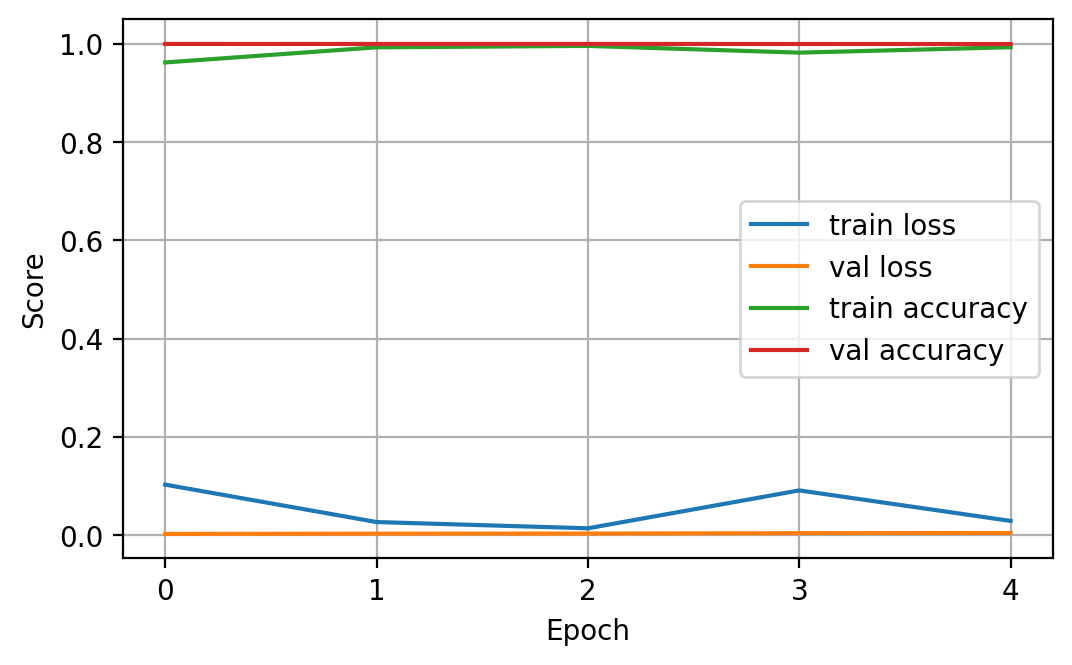

In [ ]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 3.5), dpi = 200)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.legend()

In [ ]:
scores = model.predict(X_test)
print('accuracy score',accuracy_score(Y_test,scores.argmax(axis=1)))
print('error rate:',1-accuracy_score(Y_test,scores.argmax(axis=1)))
print(classification_report(Y_test,scores.argmax(axis=1)))
confusion_matrix(Y_test,scores.argmax(axis=1))

1409/1409 [==============================] - 5s 3ms/step
accuracy score 0.9997338065661047
error rate: 0.00026619343389533423
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7135
           1       1.00      1.00      1.00     12792
           2       1.00      1.00      1.00     25153

    accuracy                           1.00     45080
   macro avg       1.00      1.00      1.00     45080
weighted avg       1.00      1.00      1.00     45080



array([[ 7134,     0,     1],
       [    1, 12783,     8],
       [    2,     0, 25151]])

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_model():
  model = Sequential()
  model.add(LSTM(16, input_shape= (X_train.shape[1], 1)))
  # model.add(Dense(16,activation='relu'))
  model.add(Dropout(0.6))
  model.add(Dense(3,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
  return model

estimator = KerasClassifier(
    build_fn=create_model,
    epochs = 5,
    verbose=1
)
cv_scores = cross_val_score(estimator,
                            x,to_categorical(y, num_classes=3),
                            cv=10
                           )
# cv_scores.mean()
print("%0.4f accuracy with a standard deviation of %0.4f" % (cv_scores.mean(), cv_scores.std()))

Epoch 1/5
6340/6340 [==============================] - 41s 5ms/step - loss: 0.1194 - accuracy: 0.9517
Epoch 2/5
6340/6340 [==============================] - 34s 5ms/step - loss: 0.0178 - accuracy: 0.9943
Epoch 3/5
6340/6340 [==============================] - 34s 5ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 4/5
6340/6340 [==============================] - 34s 5ms/step - loss: 0.0119 - accuracy: 0.9965
Epoch 5/5
705/705 [==============================] - 3s 3ms/step - loss: 8.2905e-04 - accuracy: 0.9998
Epoch 1/5
6340/6340 [==============================] - 38s 5ms/step - loss: 0.0829 - accuracy: 0.9708
Epoch 2/5
6340/6340 [==============================] - 34s 5ms/step - loss: 0.0284 - accuracy: 0.9925
Epoch 3/5
6340/6340 [==============================] - 35s 5ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 4/5
6340/6340 [==============================] - 34s 5ms/step - loss: 0.0135 - accuracy: 0.9964
Epoch 5/5
705/705 [==============================] - 3s 3ms/step - loss: 0.0029 -

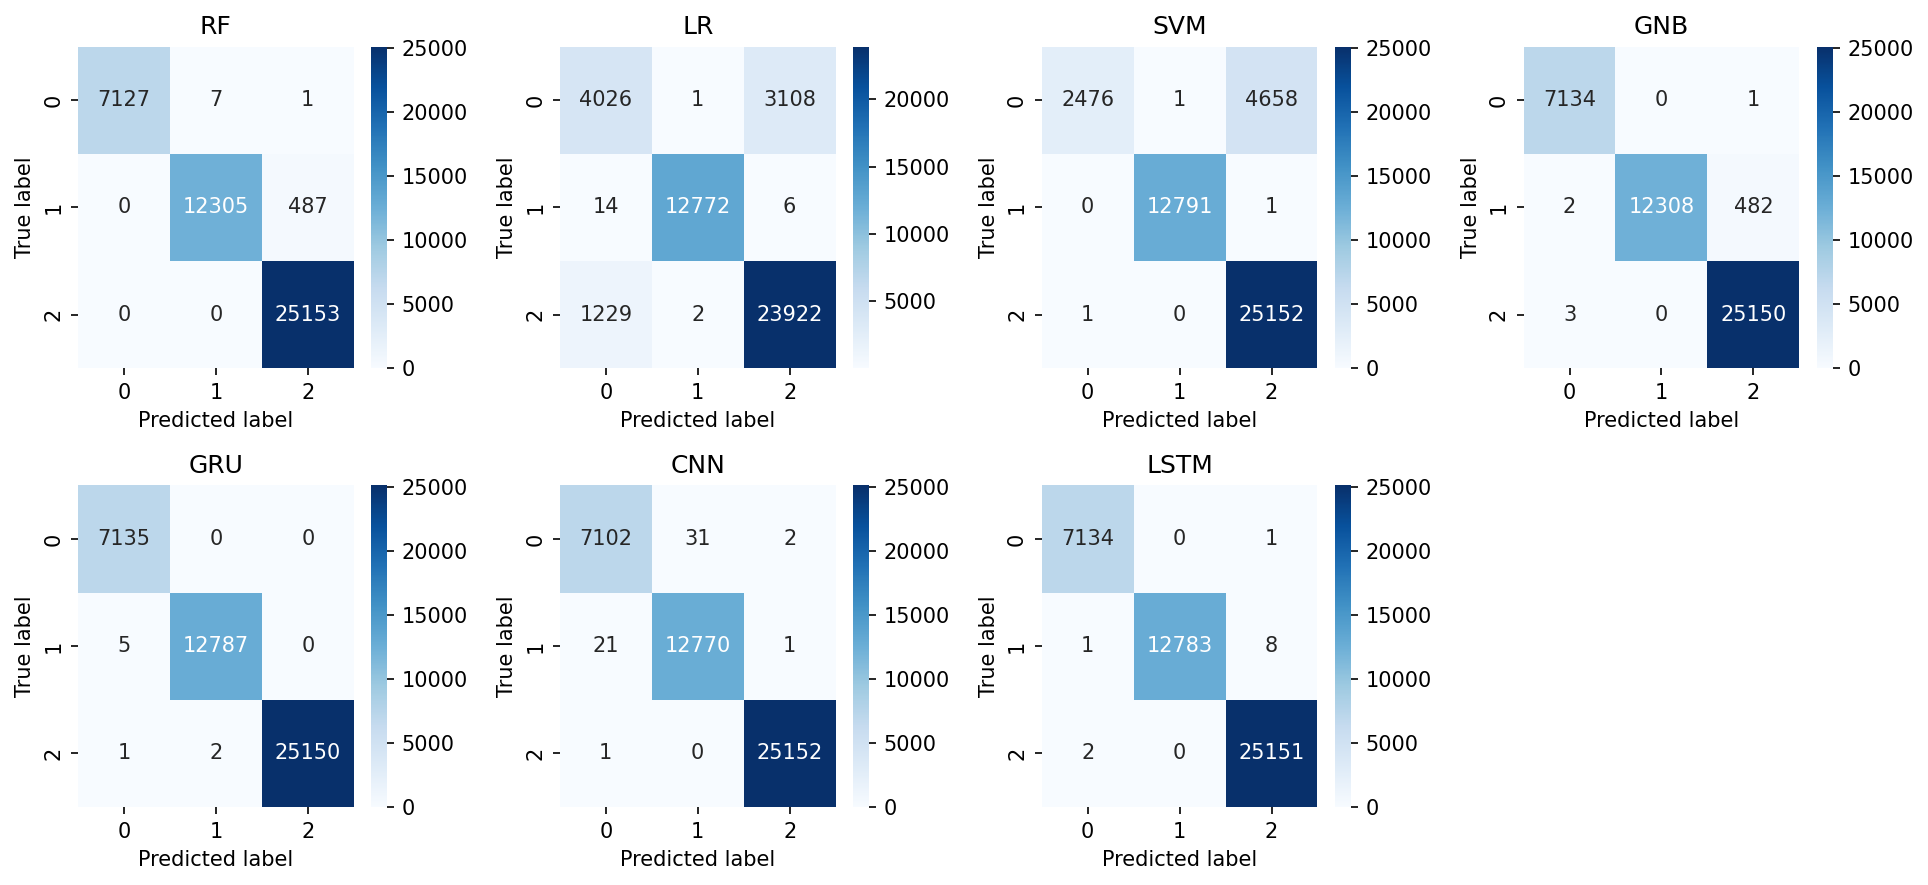

In [ ]:
array1=[[ 7127,     7,     1],
       [    0, 12305,   487],
       [    0,     0, 25153]]

array2=[[ 4026,     1,  3108],
       [   14, 12772,     6],
       [ 1229,     2, 23922]]

array3=[[ 2476,     1,  4658],
       [    0, 12791,     1],
       [    1,     0, 25152]]

array4=[[ 7134,     0,     1],
       [    2, 12308,   482],
       [    3,     0, 25150]]


array5=[[ 7135,     0,     0],
       [    5, 12787,     0],
       [    1,     2, 25150]]

array6=[[ 7102,    31,     2],
       [   21, 12770,     1],
       [    1,     0, 25152]]

array7=[[ 7134,     0,     1],
       [    1, 12783,     8],
       [    2,     0, 25151]]


# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(13,6),dpi=150)

# Create a list of confusion matrices and corresponding titles
cms =    [array1, array2, array3, array4, array5, array6,array7]
titles = ['RF'  ,'LR',   'SVM',   'GNB',  'GRU',  'CNN','LSTM']

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat[:-1], cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='g')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
axes.flat[-1].axis('off')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.tight_layout()
# Display the figure
plt.savefig('froncm.pdf')
plt.show()

# MRG with other datasets

In [14]:
df=pd.read_csv('/content/drive/MyDrive/CICIDS2017.csv')
df.fillna(0,inplace=True)

In [15]:
df[' Label'].replace(['BENIGN'],'Normal',inplace=True)
df[' Label'].replace(['Bot'],'Botnet ARES',inplace=True)
df[' Label'].replace(['FTP-Patator', 'SSH-Patator'],'Brute Force',inplace=True)
df[' Label'].replace(['DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 'Heartbleed'],'Dos/DDos',inplace=True)
df[' Label'].replace(['Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS'],'Web Attack',inplace=True)

In [16]:
df=df[df[' Label'] != 'Infiltration']

In [17]:
data = df.copy()

for column in data.columns:
    if data[column].dtype == np.int64:
        maxVal = data[column].max()
        if maxVal < 120:
            data[column] = data[column].astype(np.int8)
        elif maxVal < 32767:
            data[column] = data[column].astype(np.int16)
        else:
            data[column] = data[column].astype(np.int32)

    if data[column].dtype == np.float64:
        maxVal = data[column].max()
        minVal = data[data[column]>0][column]
        if maxVal < 120 and minVal>0.01 :
            data[column] = data[column].astype(np.float16)
        else:
            data[column] = data[column].astype(np.float32)

attackType = data[' Label'].unique()
data[' Label'] = data[' Label'].astype('category')
data[' Label'] = data[' Label'].astype("category").cat.codes

In [18]:
data.replace([np.inf, -np.inf], 0, inplace=True)

In [19]:
y = data[' Label']
X = data.drop([' Label'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=0,shuffle=True)

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
print("GNB")

estimators = [
    ('rf', RandomForestClassifier(n_estimators=4,max_depth=4, random_state=0)),
    ('svr',GaussianNB())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0)
)


start = time.time()
# Fit the stacking classifier to the training data
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

# Evaluate the performance of the stacking classifier on the testing data
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
cf_matrix=confusion_matrix(Y_test, y_pred)
cf_matrix

GNB
Training time: 155.44839024543762s
Accuracy:  0.9823012601078881
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       388
           1       0.80      0.47      0.59      2731
           2       0.93      0.98      0.95     75912
           3       0.99      0.99      0.99    455122
           4       0.99      0.99      0.99     31553
           5       0.51      0.84      0.64       436

    accuracy                           0.98    566142
   macro avg       0.87      0.71      0.70    566142
weighted avg       0.98      0.98      0.98    566142



array([[     7,      0,      0,    381,      0,      0],
       [     0,   1277,      2,   1452,      0,      0],
       [     0,     76,  74186,   1642,      1,      7],
       [     0,    237,   5379, 449040,    223,    243],
       [     0,      0,     11,    197,  31244,    101],
       [     0,      0,      4,     64,      0,    368]])

In [2]:
import os
import pandas as pd
import zipfile
from pathlib import Path
from kaggle.api.kaggle_api_extended import KaggleApi

# Set your Kaggle API key as an environment variable
os.environ['KAGGLE_USERNAME'] = 'alikfu'
os.environ['KAGGLE_KEY'] = '4bd3c8a46f43f845a7d0d4b18a3f288b'

# Authenticate with the Kaggle API
api = KaggleApi()
api.authenticate()

# Dataset URL
dataset_url = 'ekkykharismadhany/csecicids2018-cleaned'

# Download the dataset
dataset_path = Path('csecicids2018-cleaned.zip')
api.dataset_download_files(dataset_url, path=dataset_path)



In [3]:
df=pd.read_csv('/content/csecicids2018-cleaned.zip/csecicids2018-cleaned.zip')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3389,6,5206015,9,11,1213,1948,661,0,134.777778,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1,443,6,60991608,14,14,1211,3396,875,0,86.500000,...,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,53,17,27292,1,1,45,163,45,45,45.000000,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
3,443,6,70343424,17,20,1118,5653,258,0,65.764706,...,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,53,17,137267,2,2,94,214,47,47,47.000000,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252841,64678,6,1397,5,2,935,267,935,0,187.000000,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252842,51274,6,1,3,0,77,0,46,0,25.666667,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252843,80,6,233,2,0,0,0,0,0,0.000000,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252844,53,17,23818,1,1,34,204,34,34,34.000000,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1


In [5]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [6]:
df.dropna(inplace=True)

In [7]:
old_value = 1
new_value = 0
df['Label'] = df['Label'].replace(old_value, new_value)

In [8]:
for i in range(2, 12):
    old_value = i
    new_value = 1
    df['Label'] = df['Label'].replace(old_value, new_value)

In [9]:
y = df['Label']
X = df.drop(['Label'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=0,shuffle=True)

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
print("GNB")

estimators = [
    ('rf', RandomForestClassifier(n_estimators=6,max_depth=6, random_state=0)),
    ('svr',GaussianNB())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0)
)



# Fit the stacking classifier to the training data
clf.fit(X_train, Y_train)

# Evaluate the performance of the stacking classifier on the testing data
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
cf_matrix=confusion_matrix(Y_test, y_pred)
cf_matrix

GNB
Accuracy:  0.9938340583469689
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    194153
           1       0.97      1.00      0.99     56417

    accuracy                           0.99    250570
   macro avg       0.99      1.00      0.99    250570
weighted avg       0.99      0.99      0.99    250570



array([[192704,   1449],
       [    96,  56321]])